In [12]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [13]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HPG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [15]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [16]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[14.45822297 14.4452673  14.43231163 14.41935595 14.40640028 14.39344461
 14.38048893 14.36753326 14.35457759 14.34162191 14.32866624 14.31571056
 14.30275489 14.28979922 14.27684354 14.26388787 14.2509322  14.23797652
 14.22502085 14.21206518 14.1991095  14.18615383 14.17319816 14.16024248
 14.14728681 14.13433114 14.12137546 14.10841979 14.09546411 14.08250844]


In [17]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 4.506244193764287
Testing MAPE: 40.82105675420898
Testing MAE: 4.36901935218454


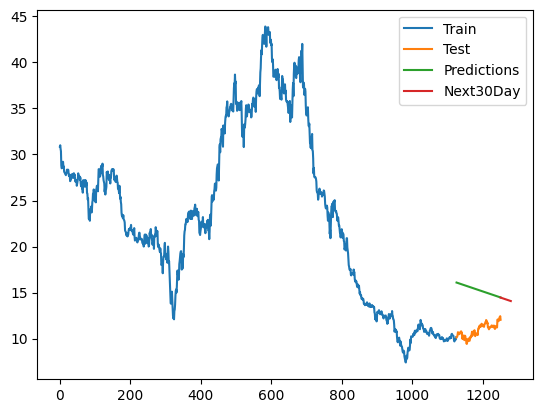

In [18]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [19]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[14.45822297 14.4452673  14.43231163 14.41935595 14.40640028 14.39344461
 14.38048893 14.36753326 14.35457759 14.34162191 14.32866624 14.31571056
 14.30275489 14.28979922 14.27684354 14.26388787 14.2509322  14.23797652
 14.22502085 14.21206518 14.1991095  14.18615383 14.17319816 14.16024248
 14.14728681 14.13433114 14.12137546 14.10841979 14.09546411 14.08250844
 14.06955277 14.05659709 14.04364142 14.03068575 14.01773007 14.0047744
 13.99181873 13.97886305 13.96590738 13.95295171 13.93999603 13.92704036
 13.91408469 13.90112901 13.88817334 13.87521767 13.86226199 13.84930632
 13.83635064 13.82339497 13.8104393  13.79748362 13.78452795 13.77157228
 13.7586166  13.74566093 13.73270526 13.71974958 13.70679391 13.69383824]


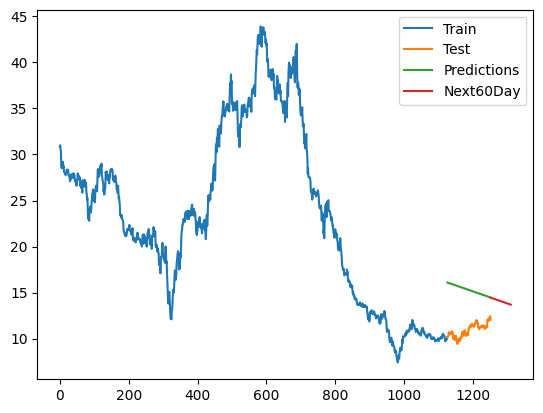

In [20]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [21]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[14.45822297 14.4452673  14.43231163 14.41935595 14.40640028 14.39344461
 14.38048893 14.36753326 14.35457759 14.34162191 14.32866624 14.31571056
 14.30275489 14.28979922 14.27684354 14.26388787 14.2509322  14.23797652
 14.22502085 14.21206518 14.1991095  14.18615383 14.17319816 14.16024248
 14.14728681 14.13433114 14.12137546 14.10841979 14.09546411 14.08250844
 14.06955277 14.05659709 14.04364142 14.03068575 14.01773007 14.0047744
 13.99181873 13.97886305 13.96590738 13.95295171 13.93999603 13.92704036
 13.91408469 13.90112901 13.88817334 13.87521767 13.86226199 13.84930632
 13.83635064 13.82339497 13.8104393  13.79748362 13.78452795 13.77157228
 13.7586166  13.74566093 13.73270526 13.71974958 13.70679391 13.69383824
 13.68088256 13.66792689 13.65497122 13.64201554 13.62905987 13.6161042
 13.60314852 13.59019285 13.57723717 13.5642815  13.55132583 13.53837015
 13.52541448 13.51245881 13.49950313 13.48654746 13.47359179 13.46063611
 13.44

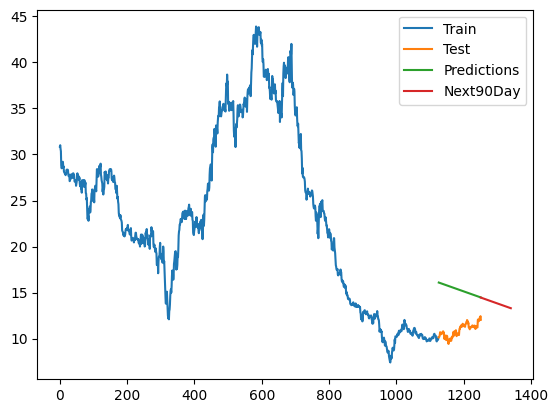

In [22]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()